<a href="https://colab.research.google.com/github/Alfianfakh/Machine-Learning/blob/main/Week7-XGBoost/NYCT_from_A_to_Z_with_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name:Alfian Fakhrezi;

Campus:Telkom University;

Faculty: Electronic Engineering Faculty;

Departement: Computer Engineering;

Cr : https://www.kaggle.com/code/karelrv/nyct-from-a-to-z-with-xgboost-tutorial/notebook 

In [15]:
%matplotlib inline
import pandas as pd
from datetime import datetime
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.linear_model import LinearRegression, Ridge,BayesianRidge
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import mean_squared_error
from math import radians, cos, sin, asin, sqrt
import seaborn as sns
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]

In [16]:
# Connect google collab with google drive
from google.colab import drive 
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
# Loading data
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [18]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # customize some aspects of its behavior, display-related options
train.head() # head here only displays the top 5 data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1.000,-73.982,40.768,-73.965,40.766,N,455.000
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1.000,-73.980,40.739,-73.999,40.731,N,663.000
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1.000,-73.979,40.764,-74.005,40.710,N,2124.000
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1.000,-74.010,40.720,-74.012,40.707,N,429.000
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1.000,-73.973,40.793,-73.973,40.783,N,435.000


**Data Summary**


In [19]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1.000,-73.982,40.768,-73.965,40.766,N,455.000
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1.000,-73.980,40.739,-73.999,40.731,N,663.000
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1.000,-73.979,40.764,-74.005,40.710,N,2124.000
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1.000,-74.010,40.720,-74.012,40.707,N,429.000
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1.000,-73.973,40.793,-73.973,40.783,N,435.000


In [20]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,358365.000,358364.000,358364.000,358364.000,358364.000,358364.000,358364.000
mean,1.535,1.662,-73.974,40.751,-73.973,40.752,955.922
std,0.499,1.310,0.040,0.036,0.038,0.036,4510.149
min,1.000,0.000,-77.896,34.712,-77.896,32.181,1.000
25%,1.000,1.000,-73.992,40.737,-73.991,40.736,397.000
50%,2.000,1.000,-73.982,40.754,-73.980,40.755,663.000
75%,2.000,2.000,-73.967,40.768,-73.963,40.770,1074.000
max,2.000,6.000,-72.810,51.881,-72.671,43.487,1939736.000


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358365 entries, 0 to 358364
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  358365 non-null  object 
 1   vendor_id           358365 non-null  int64  
 2   pickup_datetime     358365 non-null  object 
 3   dropoff_datetime    358364 non-null  object 
 4   passenger_count     358364 non-null  float64
 5   pickup_longitude    358364 non-null  float64
 6   pickup_latitude     358364 non-null  float64
 7   dropoff_longitude   358364 non-null  float64
 8   dropoff_latitude    358364 non-null  float64
 9   store_and_fwd_flag  358364 non-null  object 
 10  trip_duration       358364 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 30.1+ MB


**Trip Duration Clean-Up**

As we noted earlier there are some outliers associated with the `trip_duration` variable, specifically a 980 hour maximum trip duration and a minimum of 1 second trip duration. I've decided to exclude data that lies outside 2 standard deviations from the mean. It might be worthwhile looking into what effect excluding up to 4 standard deviations would have on the end-results.

In [22]:
m = np.mean(train['trip_duration'])
s = np.std(train['trip_duration'])
train = train[train['trip_duration'] <= m + 2*s]
train = train[train['trip_duration'] >= m - 2*s]

**Latitude and Longitude Clean-up**

Looking into it, the borders of NY City, in coordinates comes out to be:

city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

In [23]:
train = train[train['pickup_longitude'] <= -73.75]
train = train[train['pickup_longitude'] >= -74.03]
train = train[train['pickup_latitude'] <= 40.85]
train = train[train['pickup_latitude'] >= 40.63]
train = train[train['dropoff_longitude'] <= -73.75]
train = train[train['dropoff_longitude'] >= -74.03]
train = train[train['dropoff_latitude'] <= 40.85]
train = train[train['dropoff_latitude'] >= 40.63]

**Date Clean-up**

As a final step in preparing our data we need to change the formatting of the date variables (`pickup_datetime` and `dropoff_datetime`). This will help a lot with data extraction in the coming section.

In [24]:
train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime)
test['pickup_datetime'] = pd.to_datetime(test.pickup_datetime)
train.loc[:, 'pickup_date'] = train['pickup_datetime'].dt.date
test.loc[:, 'pickup_date'] = test['pickup_datetime'].dt.date
train['dropoff_datetime'] = pd.to_datetime(train.dropoff_datetime) #Not in Test

# **Initial Analysis**

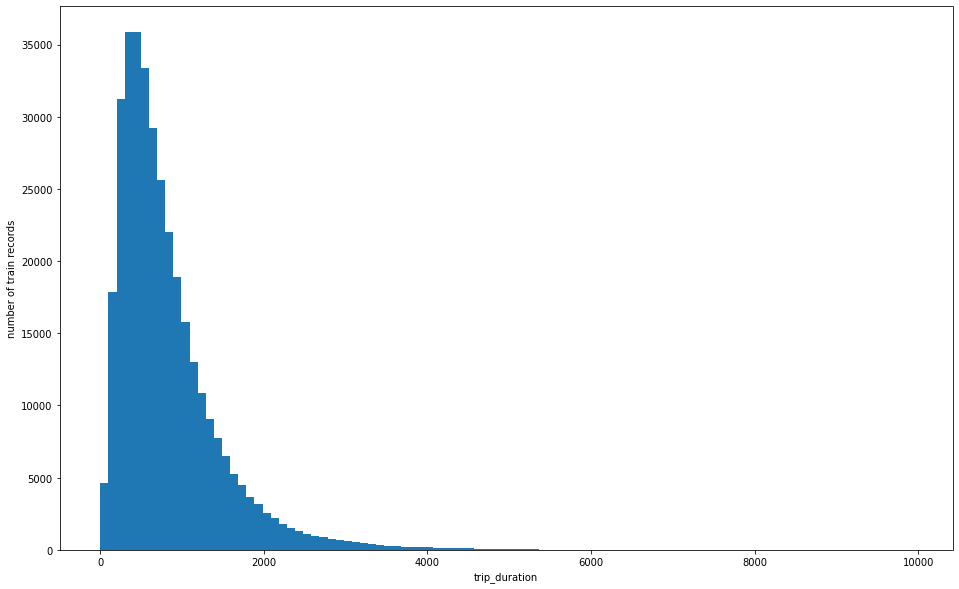

In [25]:
plt.hist(train['trip_duration'].values, bins=100)
plt.xlabel('trip_duration')
plt.ylabel('number of train records')
plt.show()

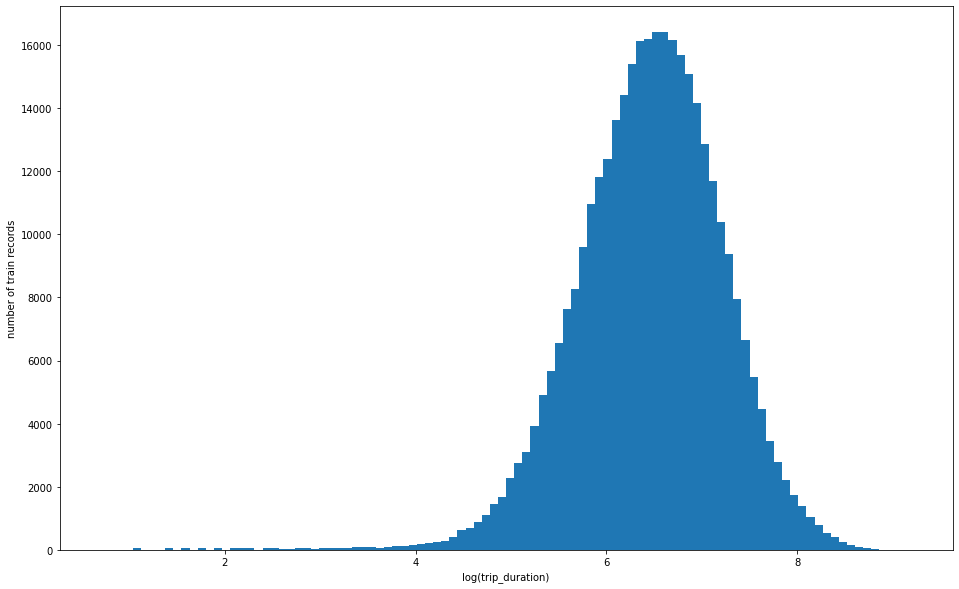

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


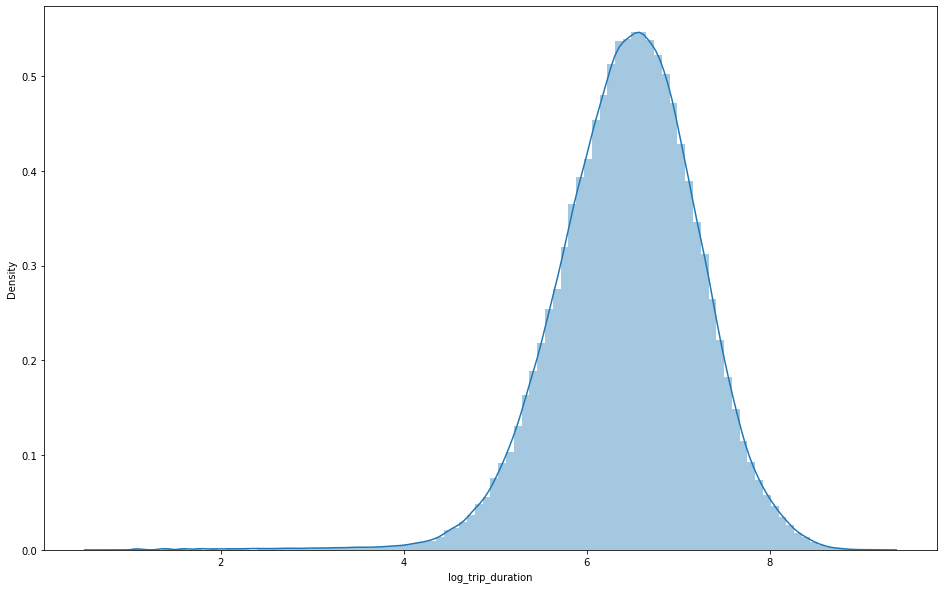

In [26]:
train['log_trip_duration'] = np.log(train['trip_duration'].values + 1)
plt.hist(train['log_trip_duration'].values, bins=100)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.show()
sns.distplot(train["log_trip_duration"], bins =100)

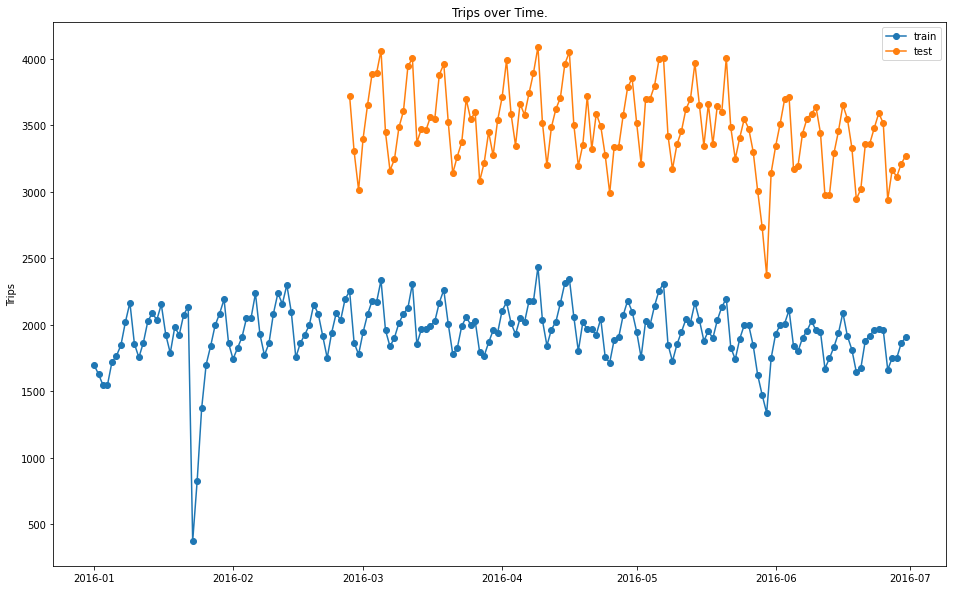

In [27]:
plt.plot(train.groupby('pickup_date').count()[['id']], 'o-', label='train')
plt.plot(test.groupby('pickup_date').count()[['id']], 'o-', label='test')
plt.title('Trips over Time.')
plt.legend(loc=0)
plt.ylabel('Trips')
plt.show()

No handles with labels found to put in legend.


Text(0, 0.5, 'Time in Seconds')

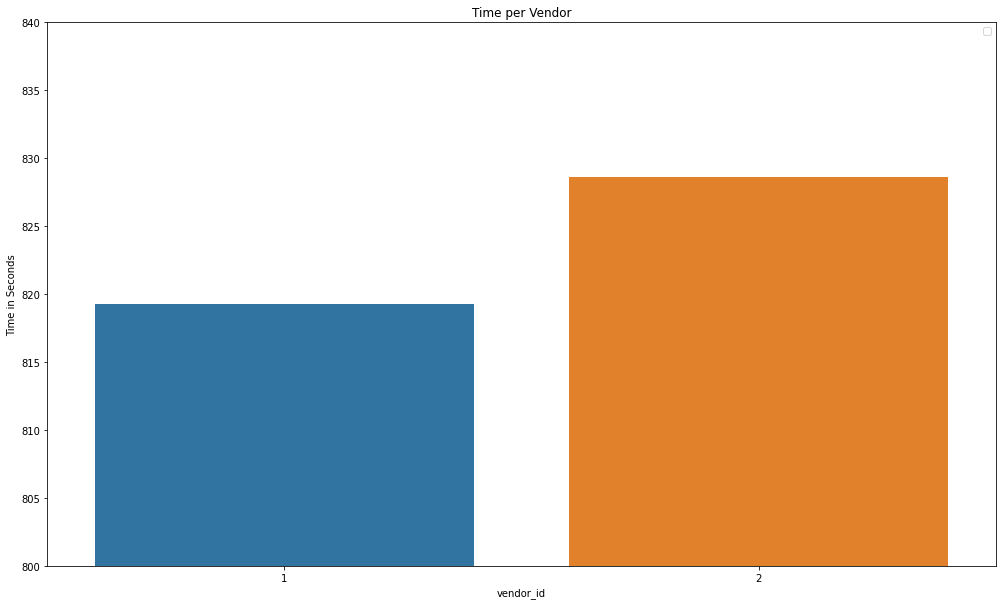

In [28]:
import warnings
warnings.filterwarnings("ignore")
plot_vendor = train.groupby('vendor_id')['trip_duration'].mean()
plt.subplots(1,1,figsize=(17,10))
plt.ylim(ymin=800)
plt.ylim(ymax=840)
sns.barplot(plot_vendor.index,plot_vendor.values)
plt.title('Time per Vendor')
plt.legend(loc=0)
plt.ylabel('Time in Seconds')

No handles with labels found to put in legend.


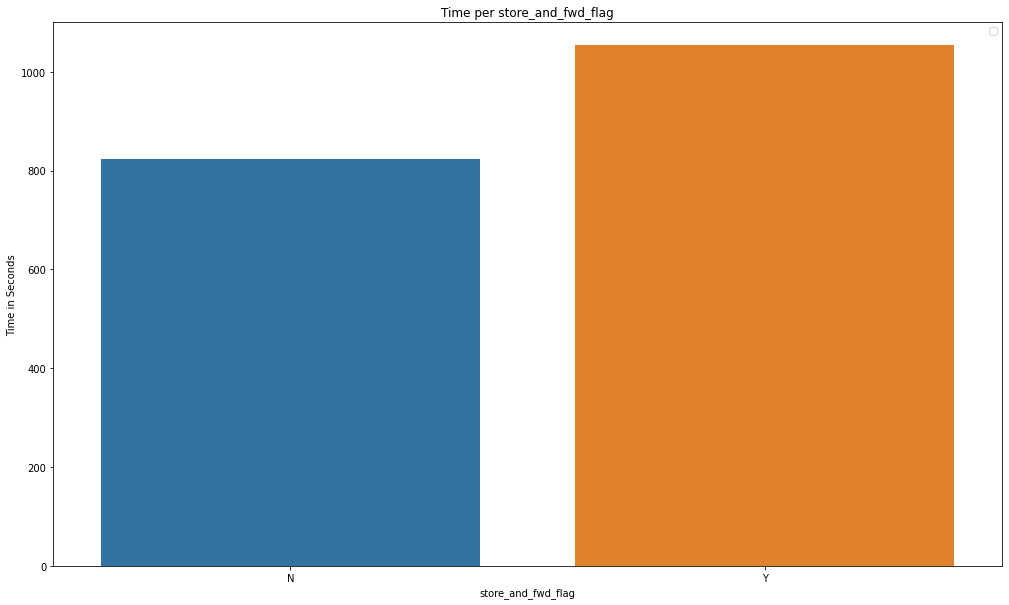

In [29]:
snwflag = train.groupby('store_and_fwd_flag')['trip_duration'].mean()

plt.subplots(1,1,figsize=(17,10))
plt.ylim(ymin=0)
plt.ylim(ymax=1100)
plt.title('Time per store_and_fwd_flag')
plt.legend(loc=0)
plt.ylabel('Time in Seconds')
sns.barplot(snwflag.index,snwflag.values)

No handles with labels found to put in legend.


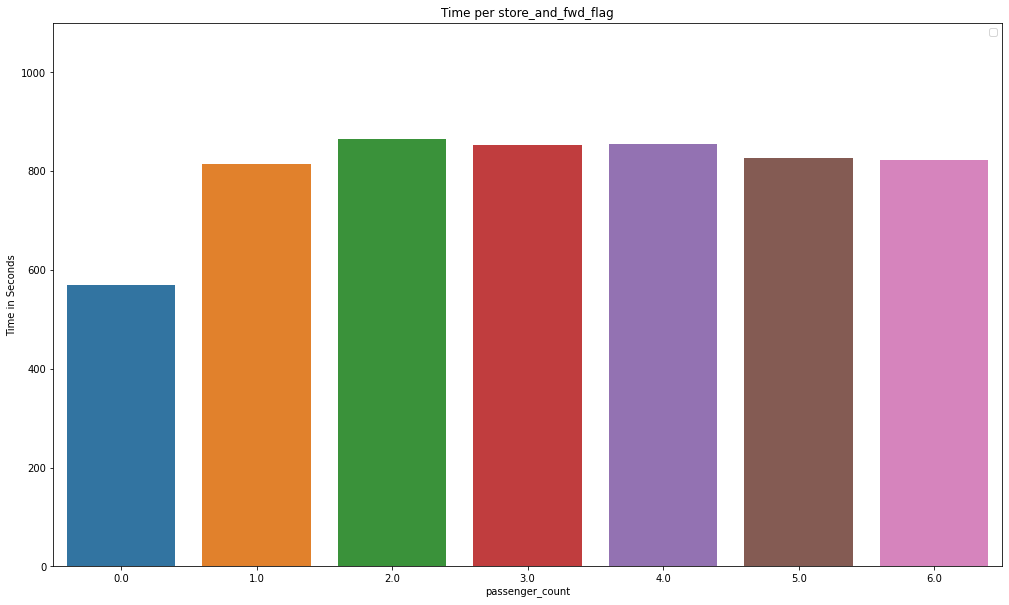

In [30]:
pc = train.groupby('passenger_count')['trip_duration'].mean()

plt.subplots(1,1,figsize=(17,10))
plt.ylim(ymin=0)
plt.ylim(ymax=1100)
plt.title('Time per store_and_fwd_flag')
plt.legend(loc=0)
plt.ylabel('Time in Seconds')
sns.barplot(pc.index,pc.values)

In [31]:
train.groupby('passenger_count').size()

passenger_count
0.000         8
1.000    250385
2.000     50832
3.000     14598
4.000      6787
5.000     18840
6.000     11541
dtype: int64

## **Pickup Locations**
To do this, we utilise the city map border coordinates for New York, mentioned earlier in the kernel to create the canvas wherein the coordinate points will be graphed. To display the actual coordinates a simple scatter plot is used:

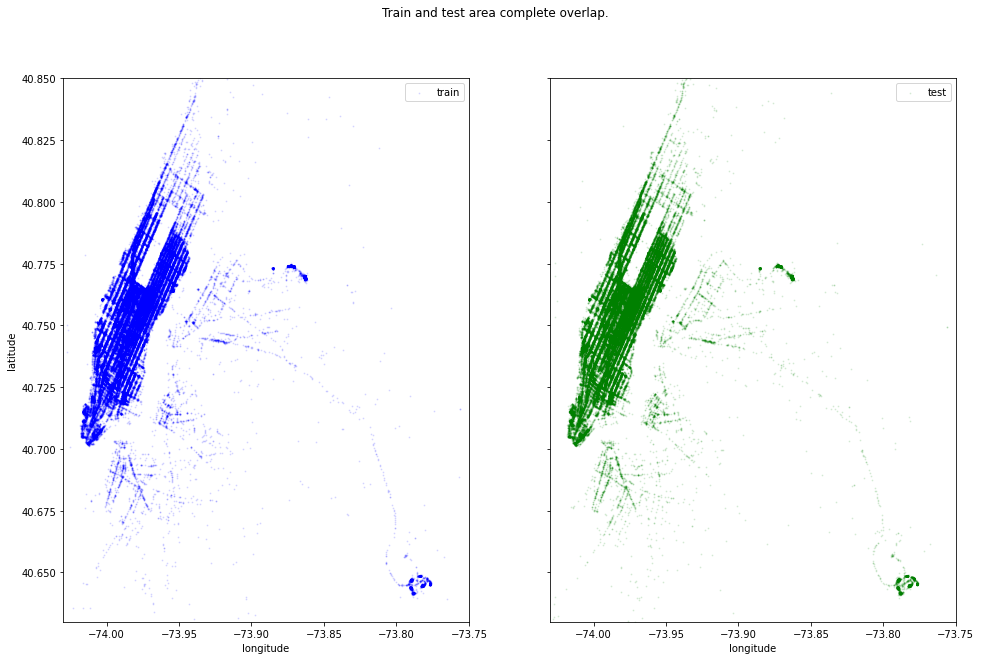

In [32]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
# sharex - used to link the x axes of subplots in the resulting figure.
# sharey - used to link the y axes of subplots in the resulting figure. 
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
# alpha - The alpha blending value, between 0 (transparent) and 1 (opaque).
ax[0].scatter(train['pickup_longitude'].values[:100000], train['pickup_latitude'].values[:100000],
              color='blue', s=1, label='train', alpha=0.1)
ax[1].scatter(test['pickup_longitude'].values[:100000], test['pickup_latitude'].values[:100000],
              color='green', s=1, label='test', alpha=0.1)
fig.suptitle('Train and test area complete overlap.')
ax[0].legend(loc=0)
ax[0].set_ylabel('latitude')
ax[0].set_xlabel('longitude')
ax[1].set_xlabel('longitude')
ax[1].legend(loc=0)
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

We can tell from the two graphs that the pickup locations are quite similar, with the notable difference being that the train data set simply has more data points (which makes sense).

## **Distance and Directionality**

This next part is quite interesting. Thanks to Beluga's post, we can determine the distance and direction of a specific trip based on the pickup and dropoff coordinates. For this I've made three functions, a

In [33]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def dummy_manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_array(lat1, lng1, lat1, lng2)
    b = haversine_array(lat1, lng1, lat2, lng1)
    return a + b

def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

Applying these functions to both the test and train data, we can calculate the haversine distance which is the great-circle distance between two points on a sphere given their longitudes and latitudes. We can then calculate the summed distance traveled in Manhattan. And finally we calculate (through some handy trigonometry) the direction (or bearing) of the distance traveled. These calculations are stored as variables in the separate data sets. The next step I decided to take is to create neighourhods, like Soho, or the Upper East Side, from the data and display this

In [34]:
train.loc[:, 'distance_haversine'] = haversine_array(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)
test.loc[:, 'distance_haversine'] = haversine_array(test['pickup_latitude'].values, test['pickup_longitude'].values, test['dropoff_latitude'].values, test['dropoff_longitude'].values)    
    
train.loc[:, 'distance_dummy_manhattan'] =  dummy_manhattan_distance(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)
test.loc[:, 'distance_dummy_manhattan'] =  dummy_manhattan_distance(test['pickup_latitude'].values, test['pickup_longitude'].values, test['dropoff_latitude'].values, test['dropoff_longitude'].values)

train.loc[:, 'direction'] = bearing_array(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)
test.loc[:, 'direction'] = bearing_array(test['pickup_latitude'].values, test['pickup_longitude'].values, test['dropoff_latitude'].values, test['dropoff_longitude'].values)

## **Lets create the "Neighborhoods"**



One might think it necessary to have a map handy to do this, but not really. This will intuitively work as KMeans will cluster the data points into their own neighborhoods. This is pretty straight forward since Numpy helps create a vertically stacked array of the pickup and dropoff coordinates, and using `sklearn`'s MiniBatchKMeans module it's easy to set up the parameters to create the clusters

There are three steps to preparing the data: create the coordinates stack, configure the KMeans clustering parameters, and create the actual clusters:

In [35]:
coords = np.vstack((train[['pickup_latitude', 'pickup_longitude']].values,
                    train[['dropoff_latitude', 'dropoff_longitude']].values))

In [36]:
sample_ind = np.random.permutation(len(coords))[:500000]
kmeans = MiniBatchKMeans(n_clusters=100, batch_size=10000).fit(coords[sample_ind])

In [37]:
train.loc[:, 'pickup_cluster'] = kmeans.predict(train[['pickup_latitude', 'pickup_longitude']])
train.loc[:, 'dropoff_cluster'] = kmeans.predict(train[['dropoff_latitude', 'dropoff_longitude']])
test.loc[:, 'pickup_cluster'] = kmeans.predict(test[['pickup_latitude', 'pickup_longitude']])
test.loc[:, 'dropoff_cluster'] = kmeans.predict(test[['dropoff_latitude', 'dropoff_longitude']])

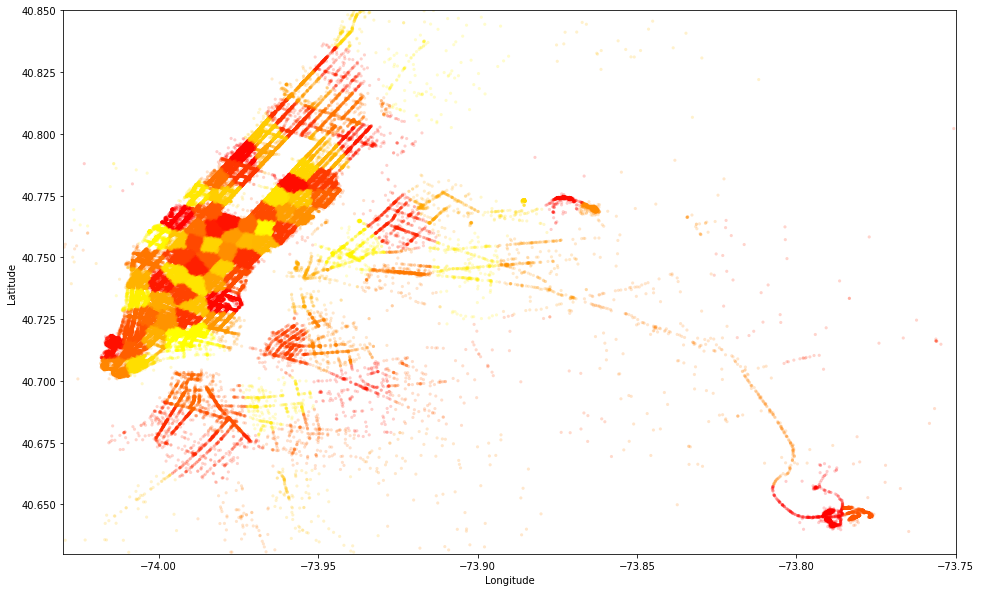

In [38]:
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(train.pickup_longitude.values[:500000], train.pickup_latitude.values[:500000], s=10, lw=0,
           c=train.pickup_cluster[:500000].values, cmap='autumn', alpha=0.2)
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

## **Date Extraction**

In [39]:
#Extracting Month
train['Month'] = train['pickup_datetime'].dt.month
test['Month'] = test['pickup_datetime'].dt.month

In [40]:
train.groupby('Month').size(),test.groupby('Month').size()

(Month
 1    55792
 2    57819
 3    62173
 4    61154
 5    59643
 6    56410
 dtype: int64, Month
 2     10034
 3    109697
 4    107432
 5    107570
 6    100445
 dtype: int64)

Both train and test data sets have 6 months, so months are ready for dummy variables (i.e. encoding).

In [41]:
train['DayofMonth'] = train['pickup_datetime'].dt.day
test['DayofMonth'] = test['pickup_datetime'].dt.day
len(train.groupby('DayofMonth').size()),len(test.groupby('DayofMonth').size())

(31, 31)

Both train and test data sets have 31 days, so days are ready for dummy variables (i.e. encoding).

In [42]:
train['Hour'] = train['pickup_datetime'].dt.hour
test['Hour'] = test['pickup_datetime'].dt.hour
len(train.groupby('Hour').size()),len(test.groupby('Hour').size())

(24, 24)

Both train and test data sets have 24 hours, so hours are ready for dummy variables (i.e. encoding).

In [43]:
train['dayofweek'] = train['pickup_datetime'].dt.dayofweek
test['dayofweek'] = test['pickup_datetime'].dt.dayofweek
len(train.groupby('dayofweek').size()),len(test.groupby('dayofweek').size())

(7, 7)

Both sets of data has 7 days per week. That's fine for encoding aswell.

So, excellent! We can safely use the different date parts in their extracted forms as part of the modelling process. Let's take a look at the average speed and how it changes over time, specifically focusing on how the hour of the day, the day of the week, and the moth of the year affects average speed. It's important to note though that average speed is a function of distance and time so it wouldn't add anything to the modelling output. We'll therefore need to remove it eventually before we train our model.

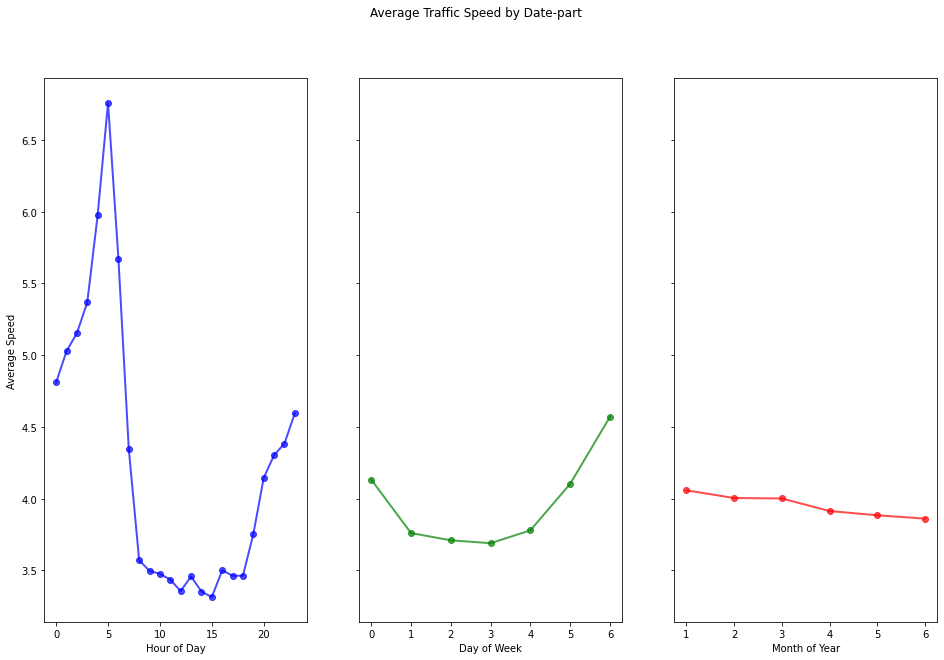

In [44]:
train.loc[:, 'avg_speed_h'] = 1000 * train['distance_haversine'] / train['trip_duration']
train.loc[:, 'avg_speed_m'] = 1000 * train['distance_dummy_manhattan'] / train['trip_duration']
fig, ax = plt.subplots(ncols=3, sharey=True)
ax[0].plot(train.groupby('Hour').mean()['avg_speed_h'], 'bo-', lw=2, alpha=0.7)
ax[1].plot(train.groupby('dayofweek').mean()['avg_speed_h'], 'go-', lw=2, alpha=0.7)
ax[2].plot(train.groupby('Month').mean()['avg_speed_h'], 'ro-', lw=2, alpha=0.7)
ax[0].set_xlabel('Hour of Day')
ax[1].set_xlabel('Day of Week')
ax[2].set_xlabel('Month of Year')
ax[0].set_ylabel('Average Speed')
fig.suptitle('Average Traffic Speed by Date-part')
plt.show()

So the interesting thing to notice here is the average speed by hour of day. We're I'm from traffic usually peaks between 5am and 9am, and then again from about 4pm to around 6 or 7pm. But it would seem in manhattan that average speed diminishes as the day goes by from around 6am and picks up again around 7 or 8pm. So most of the travelling in the Big Apple happens during work hours. The average speed by weekday follows an expected trend. Over the weekend (Friday, Saturday, Sunday) the average speed picks up quite nicely, indicating less traffic. Finally, the average trip speed by month follows an expected trend. In the winter months there are less trips (see the previous timeseries plot we made) indicating less traffic in general in the city which means you can average a higher speed on the roads.
This next part uses the pick-up locations and the average speed data we've got and plots the average speed by location.

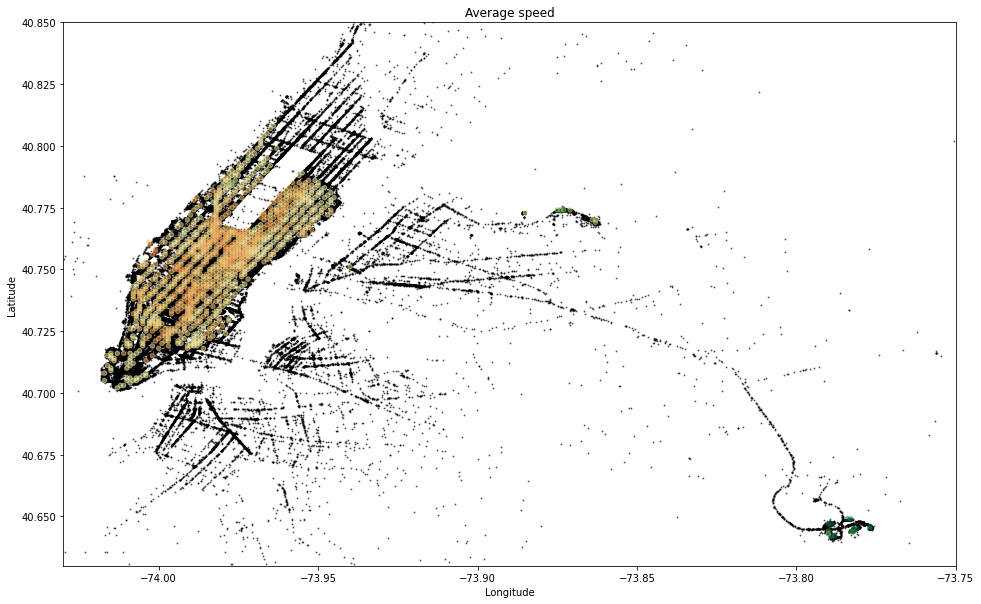

In [45]:
train.loc[:, 'pickup_lat_bin'] = np.round(train['pickup_latitude'], 3)
train.loc[:, 'pickup_long_bin'] = np.round(train['pickup_longitude'], 3)
# Average speed for regions
gby_cols = ['pickup_lat_bin', 'pickup_long_bin']
coord_speed = train.groupby(gby_cols).mean()[['avg_speed_h']].reset_index()
coord_count = train.groupby(gby_cols).count()[['id']].reset_index()
coord_stats = pd.merge(coord_speed, coord_count, on=gby_cols)
coord_stats = coord_stats[coord_stats['id'] > 100]
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(train.pickup_longitude.values[:500000], train.pickup_latitude.values[:500000], color='black', s=1, alpha=0.5)
ax.scatter(coord_stats.pickup_long_bin.values, coord_stats.pickup_lat_bin.values, c=coord_stats.avg_speed_h.values,
           cmap='RdYlGn', s=20, alpha=0.5, vmin=1, vmax=8)
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Average speed')
plt.show()

So clearly, by neighbourhood, the average speed definitely changes. To a greater extent the center of the city is the busiest (we'd expect this since the majority of activity in large cities is focused around the center) and the average speed picks up nicely around the outskirts.

## **Data Enrichment & Dummy Variables**

## **Data is not found, so only write the code without running**

### **Data Enrichment**

For this particular problem we can add OSRM ([Open Source Routing Machine](http://project-osrm.org/ "OSRM")) features. Ultimately this is a data set containing the fastest routes from specific starting points in NY

In [46]:
fr1 = pd.read_csv('../input/new-york-city-taxi-with-osrm/fastest_routes_train_part_1.csv', usecols=['id', 'total_distance', 'total_travel_time',  'number_of_steps'])
fr2 = pd.read_csv('../input/new-york-city-taxi-with-osrm/fastest_routes_train_part_2.csv', usecols=['id', 'total_distance', 'total_travel_time', 'number_of_steps'])
test_street_info = pd.read_csv('../input/new-york-city-taxi-with-osrm/fastest_routes_test.csv',
                               usecols=['id', 'total_distance', 'total_travel_time', 'number_of_steps'])
train_street_info = pd.concat((fr1, fr2))
train = train.merge(train_street_info, how='left', on='id')
test = test.merge(test_street_info, how='left', on='id')

FileNotFoundError: ignored

### **Creating Dummy Variables**

So for this step we get to the one hot encoding we spoke of earlier. Generally speaking you can do this in a few ways, but luckily Pandas helps us out again. A simple function that changes categorical data into dummy/indicator variables. Read more [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html "Pandas get_dummies"). The application is simple:

In [ ]:
vendor_train = pd.get_dummies(train['vendor_id'], prefix='vi', prefix_sep='_')
vendor_test = pd.get_dummies(test['vendor_id'], prefix='vi', prefix_sep='_')
passenger_count_train = pd.get_dummies(train['passenger_count'], prefix='pc', prefix_sep='_')
passenger_count_test = pd.get_dummies(test['passenger_count'], prefix='pc', prefix_sep='_')
store_and_fwd_flag_train = pd.get_dummies(train['store_and_fwd_flag'], prefix='sf', prefix_sep='_')
store_and_fwd_flag_test = pd.get_dummies(test['store_and_fwd_flag'], prefix='sf', prefix_sep='_')
cluster_pickup_train = pd.get_dummies(train['pickup_cluster'], prefix='p', prefix_sep='_')
cluster_pickup_test = pd.get_dummies(test['pickup_cluster'], prefix='p', prefix_sep='_')
cluster_dropoff_train = pd.get_dummies(train['dropoff_cluster'], prefix='d', prefix_sep='_')
cluster_dropoff_test = pd.get_dummies(test['dropoff_cluster'], prefix='d', prefix_sep='_')

month_train = pd.get_dummies(train['Month'], prefix='m', prefix_sep='_')
month_test = pd.get_dummies(test['Month'], prefix='m', prefix_sep='_')
dom_train = pd.get_dummies(train['DayofMonth'], prefix='dom', prefix_sep='_')
dom_test = pd.get_dummies(test['DayofMonth'], prefix='dom', prefix_sep='_')
hour_train = pd.get_dummies(train['Hour'], prefix='h', prefix_sep='_')
hour_test = pd.get_dummies(test['Hour'], prefix='h', prefix_sep='_')
dow_train = pd.get_dummies(train['dayofweek'], prefix='dow', prefix_sep='_')
dow_test = pd.get_dummies(test['dayofweek'], prefix='dow', prefix_sep='_')

We do need to check the output though (never fully trust functions without testing it

In [ ]:
vendor_train.shape,vendor_test.shape

In [ ]:
passenger_count_train.shape,passenger_count_test.shape

In [ ]:
store_and_fwd_flag_train.shape,store_and_fwd_flag_test.shape

In [ ]:
cluster_pickup_train.shape,cluster_pickup_test.shape

In [ ]:
cluster_dropoff_train.shape,cluster_dropoff_test.shape

In [ ]:
month_train.shape,month_test.shape

In [ ]:
dom_train.shape,dom_test.shape

In [ ]:
hour_train.shape,hour_test.shape

In [ ]:
dow_train.shape,dow_test.shape

Looking at the output you can tell that everything matches nicely, except for passenger count. We knew this however, since there were two trips with 9 passengers in the test set where there was no trips with 9 passengers in the train set. Like we concluded, this is clearly an error/outlier.

In [ ]:
passenger_count_test = passenger_count_test.drop('pc_9', axis = 1)

And it would seem we've finally reached the end of what is easily considered the most difficult part of data science: cleaning and wrangling the data into a usable format/structure. The last part before we actually start training the model is to drop the categorical variables (since we replaced these with our indicator variables in the previous step) and compile the final version of our test and train sets.

In [ ]:
train = train.drop(['id','vendor_id','passenger_count','store_and_fwd_flag','Month','DayofMonth','Hour','dayofweek',
                   'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis = 1)
Test_id = test['id']
test = test.drop(['id','vendor_id','passenger_count','store_and_fwd_flag','Month','DayofMonth','Hour','dayofweek',
                   'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'], axis = 1)

train = train.drop(['dropoff_datetime','avg_speed_h','avg_speed_m','pickup_lat_bin','pickup_long_bin','trip_duration'], axis = 1)

In [ ]:
train.shape,test.shape

In [ ]:
Train_Master = pd.concat([train,
                          vendor_train,
                          passenger_count_train,
                          store_and_fwd_flag_train,
                          cluster_pickup_train,
                          cluster_dropoff_train,
                         month_train,
                         dom_train,
                          hour_test,
                          dow_train
                         ], axis=1)

In [ ]:
Test_master = pd.concat([test, 
                         vendor_test,
                         passenger_count_test,
                         store_and_fwd_flag_test,
                         cluster_pickup_test,
                         cluster_dropoff_test,
                         month_test,
                         dom_test,
                          hour_test,
                          dow_test], axis=1)

In [ ]:
Train_Master.shape,Test_master.shape

In [ ]:
Train_Master = Train_Master.drop(['pickup_datetime','pickup_date'],axis = 1)
Test_master = Test_master.drop(['pickup_datetime','pickup_date'],axis = 1)

In [ ]:
Train_Master.shape,Test_master.shape

In [ ]:
Train, Test = train_test_split(Train_Master[0:100000], test_size = 0.2)

In [ ]:
X_train = Train.drop(['log_trip_duration'], axis=1)
Y_train = Train["log_trip_duration"]
X_test = Test.drop(['log_trip_duration'], axis=1)
Y_test = Test["log_trip_duration"]

Y_test = Y_test.reset_index().drop('index',axis = 1)
Y_train = Y_train.reset_index().drop('index',axis = 1)

In [ ]:
dtrain = xgb.DMatrix(X_train, label=Y_train)
dvalid = xgb.DMatrix(X_test, label=Y_test)
dtest = xgb.DMatrix(Test_master)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

## **XGBoost - Training the Model and Testing the Accuracy**



In [ ]:
#md = [6]
#lr = [0.1,0.3]
#mcw = [20,25,30]
#for m in md:
#    for l in lr:
#        for n in mcw:
#            t0 = datetime.now()
#            xgb_pars = {'min_child_weight': mcw, 'eta': lr, 'colsample_bytree': 0.9, 
#                        'max_depth': md,
#            'subsample': 0.9, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
#            'eval_metric': 'rmse', 'objective': 'reg:linear'}
#            model = xgb.train(xgb_pars, dtrain, 50, watchlist, early_stopping_rounds=10,
#                  maximize=False, verbose_eval=1)

Here is one for the fork's. I do recomend you trying to play with these metrics though...

In [ ]:
xgb_pars = {'min_child_weight': 1, 'eta': 0.5, 'colsample_bytree': 0.9, 
            'max_depth': 6,
'subsample': 0.9, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
'eval_metric': 'rmse', 'objective': 'reg:linear'}
model = xgb.train(xgb_pars, dtrain, 10, watchlist, early_stopping_rounds=2,
      maximize=False, verbose_eval=1)
print('Modeling RMSLE %.5f' % model.best_score)

Of course, what type of tutorial would this be if I didn't give some ideas about where to twea the model? Here are some steps I suggest you follow:

a. Make it more than 10 iterations before stopping. 

b.  Lower the eta-value. 

c. Increase the max depth. 

Be very careful though, there is such a thing as overfitting. I.e. training your model so well on the training set that it performs quite poorly on unseen data. Here I would suggest playing with colsample_bytree and subsample to control overfitting.

Out of interest, we can investigate the importance of each feature, to understand what affects the trip duration the most significantly. Here's how XGBoost allows us to do it:

In [ ]:
xgb.plot_importance(model, max_num_features=28, height=0.7)

The final step before submission is to make our predictions using the trained model:

In [ ]:
pred = model.predict(dtest)
pred = np.exp(pred) - 1

### **Time for Submission**

In [ ]:
submission = pd.concat([Test_id, pd.DataFrame(pred)], axis=1)
submission.columns = ['id','trip_duration']
submission['trip_duration'] = submission.apply(lambda x : 1 if (x['trip_duration'] <= 0) else x['trip_duration'], axis = 1)
submission.to_csv("submission.csv", index=False)